In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from scipy.integrate import odeint

In [2]:
alpha_pten= 1
delta_xa= 0.1 #paper
beta_xa=10 #https://febs.onlinelibrary.wiley.com/doi/full/10.1111/j.1742-4658.2012.08582.x
k_xa= 1
beta_xi= 0.01
k_xi= 1
delta_xi= 0.1
S=1.2 #signaling source of mTOR (paper)
beta_yi= 0.02 #està bé --> https://febs.onlinelibrary.wiley.com/doi/full/10.1111/j.1742-4658.2012.08582.x
k_yi=1
beta_ya= 0.017762 #està bé --> https://febs.onlinelibrary.wiley.com/doi/full/10.1111/j.1742-4658.2012.08582.x
k_ya= 1
y_total= 0.5

In [3]:
def f(xyz,t):
    xa, xi, y = xyz
    d_xa= (-alpha_pten*xyz[0])-(delta_xa*xyz[0])-((beta_xa*xyz[2]*xyz[0])/(k_xa+xyz[0]))+((beta_xi*xyz[1])/(k_xi+xyz[1]))+S
    d_xi= (alpha_pten*xyz[0])-(delta_xi*xyz[1])+((beta_xi*xyz[2]*xyz[0])/(k_xa+xyz[0]))-((beta_xi*xyz[1])/(k_xi+xyz[1]))
    d_y= -((beta_yi*xyz[0]*xyz[2])/(k_yi+xyz[2]))+((beta_ya*(y_total-xyz[2]))/(k_ya+(y_total-xyz[2])))
    return [d_xa, d_xi, d_y]

Text(0, 0.5, 'cell concentration')

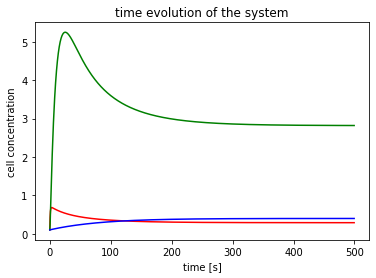

In [4]:
t=np.arange(0,500,0.5)
x0y0z0=[0.1,0.1,0.1]


xyz_out=odeint(f,x0y0z0,t)

plt.figure()
plt.plot(t,xyz_out[:,0],color='r')
plt.plot(t,xyz_out[:,1],color='g')
plt.plot(t,xyz_out[:,2],color='b')

plt.title('time evolution of the system')
#plt.legend('mTOR active','mTOR inactive','TSC')
plt.xlabel('time [s]')
plt.ylabel('cell concentration')

Text(0, 0.5, 'mTOR active concentration')

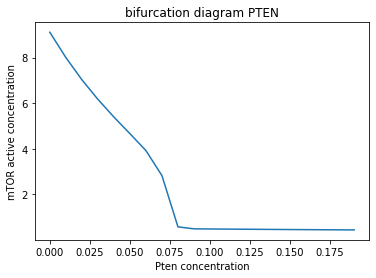

In [9]:
beta_yi=0.02
beta_ya= 0.017762

x0y0z0=[0.1,0.1,0.1]
alpha_max=0.2
dalpha=0.01
fix_points=np.zeros(20)
alpha_pten_vec=np.arange(0,alpha_max,dalpha)
t=np.arange(0,500,0.5)
i=0

for alpha_pten in alpha_pten_vec:
    def f(xyz,t):
        xa, xi, y = xyz
        d_xa= (-alpha_pten*xyz[0])-(delta_xa*xyz[0])-((beta_xa*xyz[2]*xyz[0])/(k_xa+xyz[0]))+((beta_xi*xyz[1])/(k_xi+xyz[1]))+S
        d_xi= (alpha_pten*xyz[0])-(delta_xi*xyz[1])+((beta_xi*xyz[2]*xyz[0])/(k_xa+xyz[0]))-((beta_xi*xyz[1])/(k_xi+xyz[1]))
        d_y= -((beta_yi*xyz[0]*xyz[2])/(k_yi+xyz[2]))+((beta_ya*(y_total-xyz[2]))/(k_ya+(y_total-xyz[2])))
        return [d_xa, d_xi, d_y]

    
    xyz_out=odeint(f,x0y0z0,t)
    fix_points[i]=xyz_out[-1,0]
    x0y0z0=[xyz_out[-1,0],xyz_out[-1,1],xyz_out[-1,2]]
    i=i+1

plt.figure()
plt.plot(alpha_pten_vec,fix_points)

plt.title('bifurcation diagram PTEN')
#plt.legend('mTOR active','mTOR inactive','TSC')
plt.xlabel('Pten concentration')
plt.ylabel('mTOR active concentration')


Text(0, 0.5, 'mTOR active concentration')

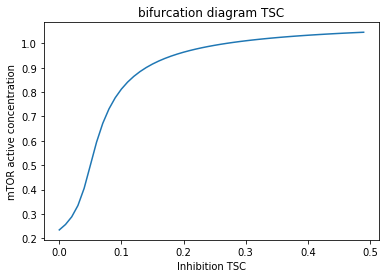

In [10]:
alpha_pten=1
beta_ya= 0.017762

x0y0z0=[0.1,0.1,0.1]
betayi_max=0.5
dbetayi=0.01
fix_points=np.zeros(50)
betayi_vec=np.arange(0,betayi_max,dbetayi)
t=np.arange(0,500,0.5)
i=0

for beta_yi in betayi_vec:
    def f(xyz,t):
        xa, xi, y = xyz
        d_xa= (-alpha_pten*xyz[0])-(delta_xa*xyz[0])-((beta_xa*xyz[2]*xyz[0])/(k_xa+xyz[0]))+((beta_xi*xyz[1])/(k_xi+xyz[1]))+S
        d_xi= (alpha_pten*xyz[0])-(delta_xi*xyz[1])+((beta_xi*xyz[2]*xyz[0])/(k_xa+xyz[0]))-((beta_xi*xyz[1])/(k_xi+xyz[1]))
        d_y= -((beta_yi*xyz[0]*xyz[2])/(k_yi+xyz[2]))+((beta_ya*(y_total-xyz[2]))/(k_ya+(y_total-xyz[2])))
        return [d_xa, d_xi, d_y]

    
    xyz_out=odeint(f,x0y0z0,t)
    fix_points[i]=xyz_out[-1,0]
    x0y0z0=[xyz_out[-1,0],xyz_out[-1,1],xyz_out[-1,2]]
    i=i+1

plt.figure()
plt.plot(betayi_vec,fix_points)

plt.title('bifurcation diagram TSC')
#plt.legend('mTOR active','mTOR inactive','TSC')
plt.xlabel('Inhibition TSC')
plt.ylabel('mTOR active concentration')



Text(0, 0.5, 'mTOR active concentration')

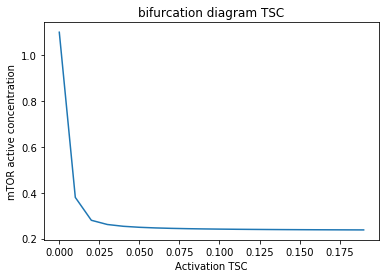

In [13]:
alpha_pten=1
beta_yi=0.02

x0y0z0=[0.01,0.01,0.01]
betaya_max=0.2
dbetaya=0.01
fix_points=np.zeros(20)
betaya_vec=np.arange(0,betaya_max,dbetaya)
t=np.arange(0,500,0.5)
i=0

for beta_ya in betaya_vec:
    def f(xyz,t):
        xa, xi, y = xyz
        d_xa= (-alpha_pten*xyz[0])-(delta_xa*xyz[0])-((beta_xa*xyz[2]*xyz[0])/(k_xa+xyz[0]))+((beta_xi*xyz[1])/(k_xi+xyz[1]))+S
        d_xi= (alpha_pten*xyz[0])-(delta_xi*xyz[1])+((beta_xi*xyz[2]*xyz[0])/(k_xa+xyz[0]))-((beta_xi*xyz[1])/(k_xi+xyz[1]))
        d_y= -((beta_yi*xyz[0]*xyz[2])/(k_yi+xyz[2]))+((beta_ya*(y_total-xyz[2]))/(k_ya+(y_total-xyz[2])))
        return [d_xa, d_xi, d_y]

    
    xyz_out=odeint(f,x0y0z0,t)
    fix_points[i]=xyz_out[-1,0]
    x0y0z0=[xyz_out[-1,0],xyz_out[-1,1],xyz_out[-1,2]]
    i=i+1

plt.figure()
plt.plot(betaya_vec,fix_points)

plt.title('bifurcation diagram TSC')
#plt.legend('mTOR active','mTOR inactive','TSC')
plt.xlabel('Activation TSC')
plt.ylabel('mTOR active concentration')